In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
#Add another variable to the dataframe identifying the number of characters in the textfile
def get_num_chars(essay_id):
    path ='train/' + essay_id + '.txt'
    file = open(path, "r")
    data = file.read()
    return len(data.split(" "))

train['num_chars'] = train['essay_id'].transform(get_num_chars)

In [4]:
#transform categorical variables to binary dummies
discourse_temp = pd.get_dummies(train['discourse_type'])
effectiveness_temp = pd.get_dummies(train['discourse_effectiveness'])

In [5]:
#Recombine the dataset to include dummy variables but not categorical ones
train = pd.concat([train, discourse_temp, effectiveness_temp], axis = 1)

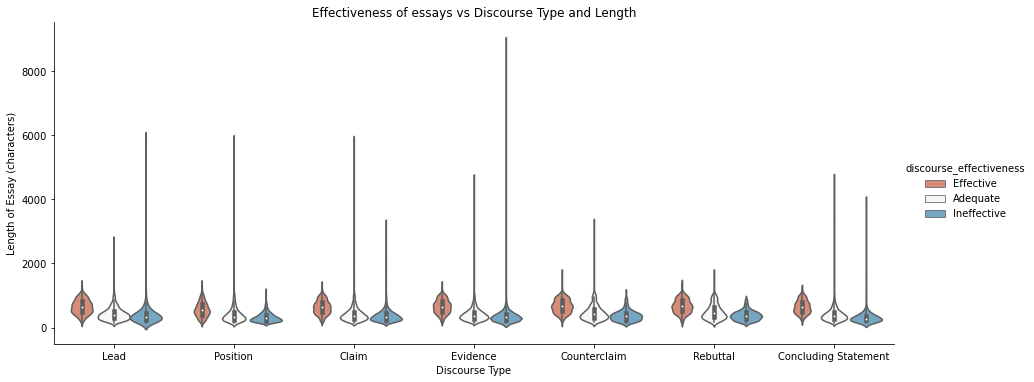

In [23]:
#Scatterplot showing discourse effectiveness as it relates to essay length and discourse type
g = sns.catplot(data=train, 
                x="discourse_type", 
                y="num_chars", 
                hue="discourse_effectiveness", 
                hue_order = ['Effective', 'Adequate', 'Ineffective'],
                kind = 'violin',
                palette = 'RdBu',
                aspect = 2.5).set(title = 'Effectiveness of essays vs Discourse Type and Length',
                               xlabel = 'Discourse Type',
                               ylabel = 'Length of Essay (characters)')

plt.show(g)

In [41]:
#Create an equivalent plot to the one above, removing outliers in length
train.describe()
#Q3 = 585, Q1 = 291, use the formula below to find the upper limit using the 1.5 IQR rule
#Q3 + 1.5(Q3-Q1)
585 + 1.5*(585-291)

1026.0

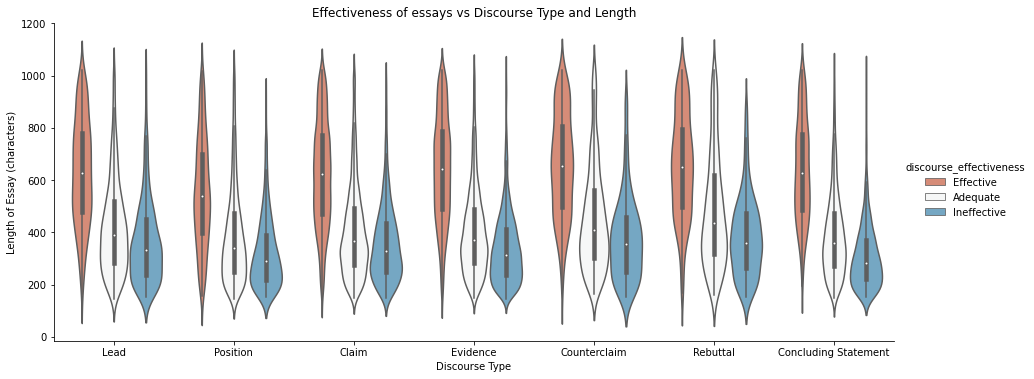

In [42]:
#Scatterplot showing discourse effectiveness as it relates to essay length and discourse type
#Outliers in essay length have been removed
g = sns.catplot(data=train.where(train.num_chars < 1026).dropna(), 
                x="discourse_type", 
                y="num_chars", 
                hue="discourse_effectiveness", 
                hue_order = ['Effective', 'Adequate', 'Ineffective'],
                kind = 'violin',
                palette = 'RdBu',
                aspect = 2.5).set(title = 'Effectiveness of essays vs Discourse Type and Length',
                               xlabel = 'Discourse Type',
                               ylabel = 'Length of Essay (characters)')

plt.show(g)